# **Gradient Boosting Machine (GBM) Nedir?**

Gradient Boosting Machine (GBM), **AdaBoost** algoritmasının sınıflandırma ve regresyon problemlerine uyarlanmış genelleştirilmiş bir versiyonudur. **Boosting** yöntemlerine dayanır ve birden fazla zayıf tahminciyi (weak learner) bir araya getirerek güçlü bir tahmin modeli oluşturmayı hedefler.

---

### **Ana İlkeler**

1. **Artıklar Üzerine Kurulma**  
   GBM, tek bir tahmin modeli oluşturmak için bir dizi modeli seri halinde kurar.  
   - Her bir model, serideki bir önceki modelin **tahmin hataları** (residuals) üzerine kurulur.  
   - Bu süreç, her adımda hataların iyileştirilmesi üzerine odaklanır.

2. **Kötü Tahminler ve Güçlü Öğrenme**  
   - **Kötü tahminler**, gerçek değerler ile tahmin edilen değerler arasındaki farkın karesiyle (squared residuals) ifade edilir.  
   - GBM, kötü tahminlerin üzerine yoğunlaşarak bu hataları gidermeye çalışır.  
   - Zayıf tahminciler, kötü tahminleri düzeltmek için eğitilir.

3. **Gradient Descent ile Optimizasyon**  
   - GBM, diferansiyellenebilir herhangi bir **kayıp fonksiyonunu** optimize edebilir.  
   - Optimizasyon için **Gradient Descent** algoritmasını kullanır.  

4. **Temel Öğrenici Tipleri (Base Learners)**  
   - GBM çeşitli temel öğrenici türlerini destekler:  
     - Karar ağaçları (Trees)  
     - Doğrusal terimler (Linear Terms)  
     - Eğri uyumlama (Splines) vb.

---

### **Gradient Boosting ve AdaBoost Karşılaştırması**

- **AdaBoost**  
  - Zayıf sınıflandırıcıları birleştirerek güçlü bir sınıflandırıcı oluşturur.  
  - Kötü tahminlere daha fazla ağırlık vererek hataları azaltır.

- **Gradient Boosting**  
  - AdaBoost’un bir genelleştirilmiş versiyonudur.  
  - Kayıp fonksiyonunu Gradient Descent ile minimize eder.  
  - Sınıflandırma ve regresyon problemleri için geniş bir uygulama alanı sunar.


---
### **Gradient Boosting'in Gücü**

- **Boosting + Gradient Descent** yaklaşımını birleştirir.  
- Aşamalı olarak iyileşen bir tahmin modeli oluşturur.  
- Esnekliği sayesinde karmaşık problemleri çözmede yüksek performans sağlar.


In [1]:
# kütüphaneler

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# Veri setinin yüklenmesi
df = pd.read_csv(r"C:\Users\Emirhan Tozlu\Desktop\machine learning\Doğrusal Olmayan Regresyon Modelleri\KNN ALgoritması\Hitters.csv")
df = df.dropna()  


dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])


y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype('float64')
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [4]:
### model T<hmin

gbm_model=GradientBoostingRegressor().fit(X_train,y_train)
gbm_model


GradientBoostingRegressor()

In [5]:
y_pred=gbm_model.predict(X_test)

In [6]:
np.sqrt(mean_squared_error(y_test,y_pred))

352.09634877536416

In [7]:
# Model Tuning

In [8]:
gbm_params={"learning_rate": [0.001,0.1,0.01],
           "max_depth":[3,5,8,],
           "n_estimators":[100,200,500],
           "subsample":[1,0.5,0.8],
           "loss":["ls","ld","quantile"]}

In [9]:
gbm_cv_model=GridSearchCV(gbm_model,
                          gbm_params,
                          cv=10,
                          n_jobs=-1,
                          verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


In [10]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'quantile',
 'max_depth': 8,
 'n_estimators': 500,
 'subsample': 0.5}

In [11]:
gbm_tuned=GradientBoostingRegressor(learning_rate=0.1,
                                   loss="absolute_error", # lad ifadesi artık kullanılmıyor.
                                   max_depth=3,
                                   n_estimators=200,
                                   subsample=1).fit(X_train,y_train)

In [12]:
y_pred=gbm_tuned.predict(X_test)

In [13]:
np.sqrt(mean_squared_error(y_test,y_pred))

331.34085178422686

In [14]:
# DEğişken önem düzeyleri

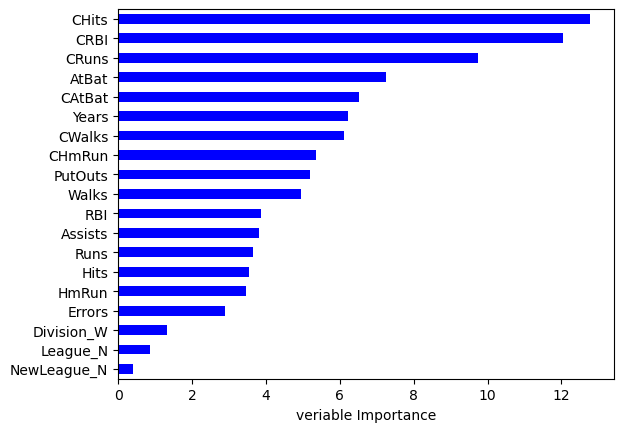

In [15]:
Importance=pd.DataFrame({"Importance":gbm_tuned.feature_importances_*100},
                        index=X_train.columns)
Importance.sort_values(by="Importance",axis=0,ascending=True).plot(kind="barh",color="b")

plt.xlabel("veriable Importance")
plt.gca().legend_=None